In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.read_csv('/Users/yikaimao/Desktop/DSC_180B/Intel-capstone/data/raw/raw.csv')
df = df.drop(columns = ['Unnamed: 0'])

In [4]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'].dt.date.unique()

array([datetime.date(2022, 12, 12), datetime.date(2022, 12, 13),
       datetime.date(2022, 12, 14), datetime.date(2022, 12, 15),
       datetime.date(2022, 12, 16), datetime.date(2022, 12, 17),
       datetime.date(2022, 12, 18), datetime.date(2022, 12, 19),
       datetime.date(2022, 12, 20), datetime.date(2022, 12, 21),
       datetime.date(2022, 12, 22), datetime.date(2022, 12, 23),
       datetime.date(2023, 1, 9), datetime.date(2023, 1, 10),
       datetime.date(2023, 1, 11), datetime.date(2023, 1, 13)],
      dtype=object)

Data collection period:
2022/12/12 ~ 2022/12/23,
2023/1/9   ~ 2023/1/11, 2023/1/13

### EDA on .exe

In [5]:
exe = df[df['ID'] == 3]
exe_value_counts = exe['value'].value_counts()
exe_value_counts

firefox.exe               1262
LeagueClientUx.exe         718
explorer.exe               519
chrome.exe                 428
League of Legends.exe      421
                          ... 
SplashScreenClassName        1
RCLIENT                      1
vpndownloader.exe            1
#32768                       1
ApplicationFrameWindow       1
Name: value, Length: 71, dtype: int64

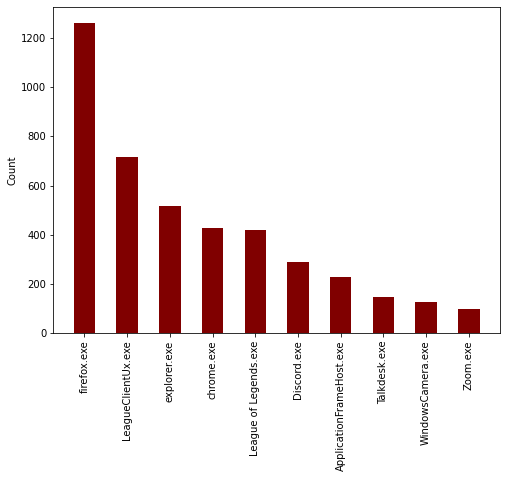

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(exe_value_counts.index[:10], exe_value_counts.values[:10], color ='maroon',
        width = 0.5)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [7]:
exe_value_counts.index.unique()

Index(['firefox.exe', 'LeagueClientUx.exe', 'explorer.exe', 'chrome.exe',
       'League of Legends.exe', 'Discord.exe', 'ApplicationFrameHost.exe',
       'Talkdesk.exe', 'WindowsCamera.exe', 'Zoom.exe', 'Teams.exe',
       'RiotClientUx.exe', 'WeChat.exe', 'SearchApp.exe', 'devenv.exe',
       'cmd.exe', 'OUTLOOK.EXE', 'Microsoft.Photos.exe', 'notepad++.exe',
       'ShellExperienceHost.exe', 'audacity.exe', 'VsDebugConsole.exe',
       'MozillaWindowClass', 'steamwebhelper.exe', 'steam.exe',
       'WechatBrowser.exe', 'obs64.exe', 'Spotify.exe',
       'EpicGamesLauncher.exe', 'vlc.exe', 'Acrobat.exe', 'Yakuza0.exe',
       'ScreenClippingHost.exe', 'Taskmgr.exe', 'msedge.exe', 'iCloud.exe',
       'Code.exe', 'LeagueClient.exe', 'vpnui.exe',
       'Chrome_RenderWidgetHostHWND', 'DB Browser for SQLite.exe',
       'MSTaskListWClass', '7zFM.exe', 'notepad.exe',
       'Windows.UI.Core.CoreWindow', 'SystemSettings.exe',
       'StartMenuExperienceHost.exe', 'WerFault.exe',
       'M

Firefox has the most usage

### EDA on time

In [84]:
hour_counts = exe['Time'].dt.hour.value_counts()

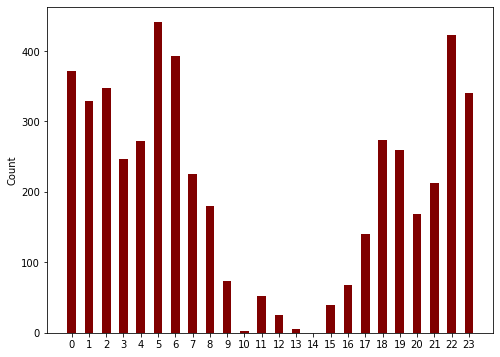

In [88]:
plt.figure(figsize=(8, 6))
plt.bar(hour_counts.index, hour_counts.values, color ='maroon',
        width = 0.5)

plt.ylabel('Count')
plt.xticks(np.arange(0, 24))
plt.show()

User dedicates most of their time during late nights and early morning

### EDA on Display

In [72]:
display = df[df['ID'] == 5]
display.value.unique()

array(['\\DISPLAY1', '\\DISPLAY9'], dtype=object)

Two displays being used

In [73]:
display['Date'] = display.Time.dt.date
display_counts = display.groupby(['Date', 'value']).count().unstack(fill_value=0).stack().reset_index()

/var/folders/9d/sh2p_bp92273d543gygz4_jw0000gn/T/ipykernel_51767/859376004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display['Date'] = display.Time.dt.date


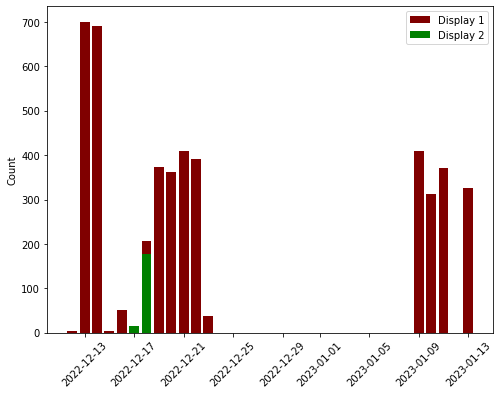

In [95]:
plt.figure(figsize=(8, 6))
display1_counts = display_counts[display_counts['value'] == '\DISPLAY1']
display9_counts = display_counts[display_counts['value'] == '\DISPLAY9']
plt.bar(display1_counts['Date'], display1_counts['Time'], color='maroon', label='Display 1')
plt.bar(display9_counts['Date'], display9_counts['Time'], color='green', label='Display 2')
plt.tick_params(axis='x', labelrotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

User mostly uses one display and sometimes uses the other one. It is also a plot for number of changes of foreground windows per day.